In [14]:
# import packages and data set
import pandas as pd
import numpy as np

from google.colab import drive, files
drive.mount('/content/gdrive')
csv_data = 'gdrive/My Drive/Colab Notebooks/ML lab/Lab2/cwurData.csv'
data_df = pd.read_csv(csv_data, sep=',')
# inspect
data_df.head(3).T

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


In [15]:
# remove rows containing NaN, keep the valid data
data_df = data_df.dropna()
len(data_df)

2000

In [16]:
''' Deprecated '''
# Note that the data set contains more than one year of records of some universities
# take the average scores
df = data_df.groupby('institution')
df.first()
print(df.get_group('Harvard University'))
df = df.mean().reset_index()
df = df.drop(columns = ['year'])
df.sort_values(by='score', ascending=False)

      world_rank region  national_rank  ...  patents  score  year
200            1    USA              1  ...        2  100.0  2014
1200           1    USA              1  ...        3  100.0  2015

[2 rows x 13 columns]


,institution,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
184,Harvard University,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.5,100.000
511,Stanford University,2.0,2.0,10.0,2.0,4.0,5.0,3.0,3.0,4.0,8.0,98.875
312,Massachusetts Institute of Technology,3.0,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,98.115
637,University of Cambridge,4.0,1.0,2.0,10.0,5.0,10.5,7.5,12.0,13.0,48.0,97.225
819,University of Oxford,5.0,2.0,7.0,12.5,10.0,9.0,12.0,9.0,10.5,15.5,96.985
...,...,...,...,...,...,...,...,...,...,...,...,...
545,Tianjin Medical University,976.0,76.0,367.0,567.0,218.0,885.0,857.0,812.0,946.0,839.0,44.050
490,Shenzhen University,975.0,75.0,367.0,410.0,218.0,976.0,778.0,645.0,999.0,318.0,44.050
23,Babeș-Bolyai University,987.0,2.0,367.0,567.0,218.0,874.0,855.0,812.0,958.0,871.0,44.040
188,Henan Normal University,990.0,80.0,367.0,567.0,218.0,959.0,991.0,812.0,958.0,871.0,44.040


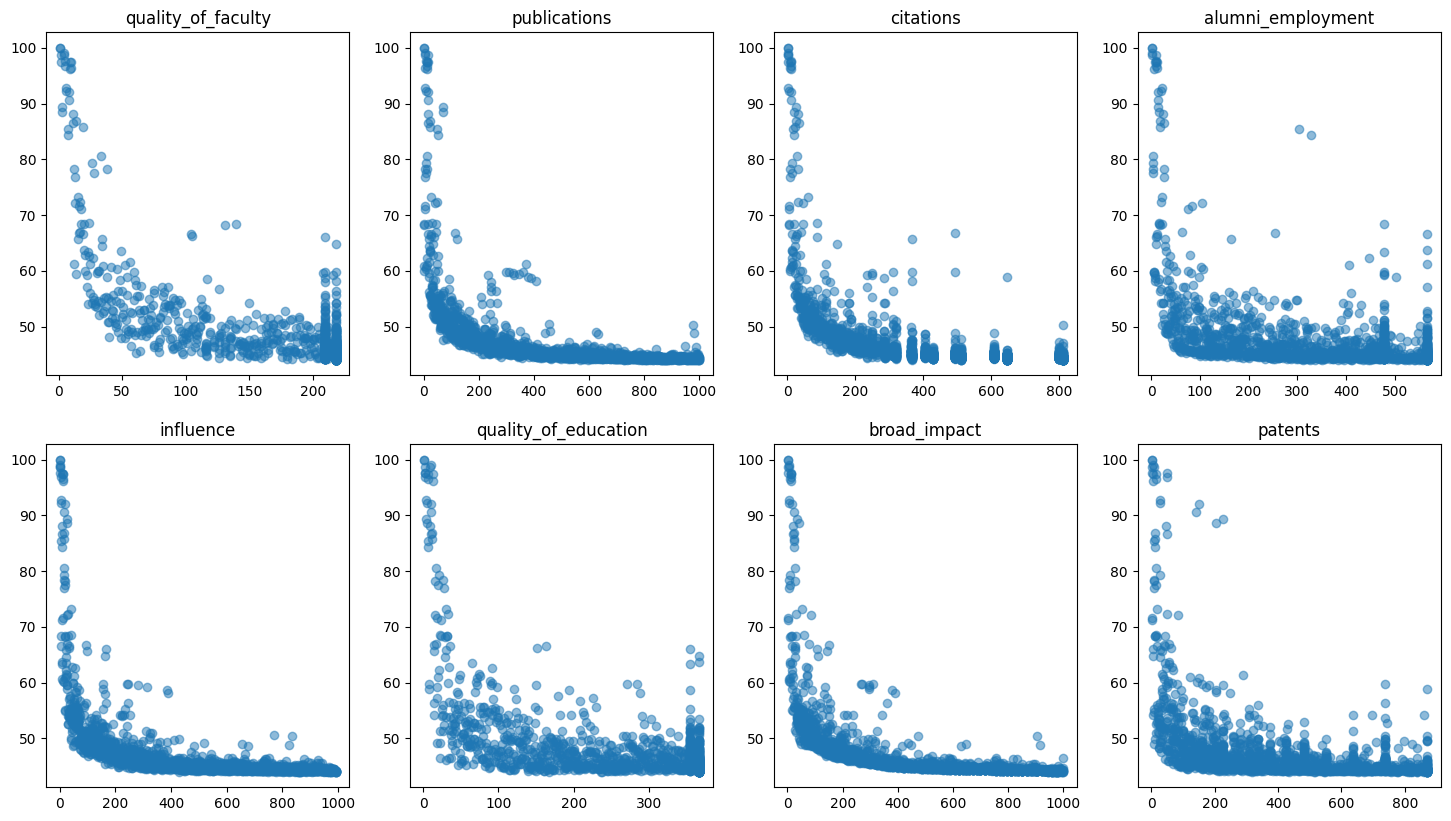

In [17]:
# inspect the the original data
import matplotlib.pyplot as plt

feature_names = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']

fig, axes = plt.subplots(2,4, figsize = (18, 10), dpi = 100)
ax = axes.flatten()
for i, feature in enumerate(feature_names):
  ax[i].scatter(data_df[feature], data_df['score'], alpha = 0.5)
  ax[i].set_title(feature)


# plt.savefig("features_visualization.png")
# files.download("features_visualization.png")
plt.show()

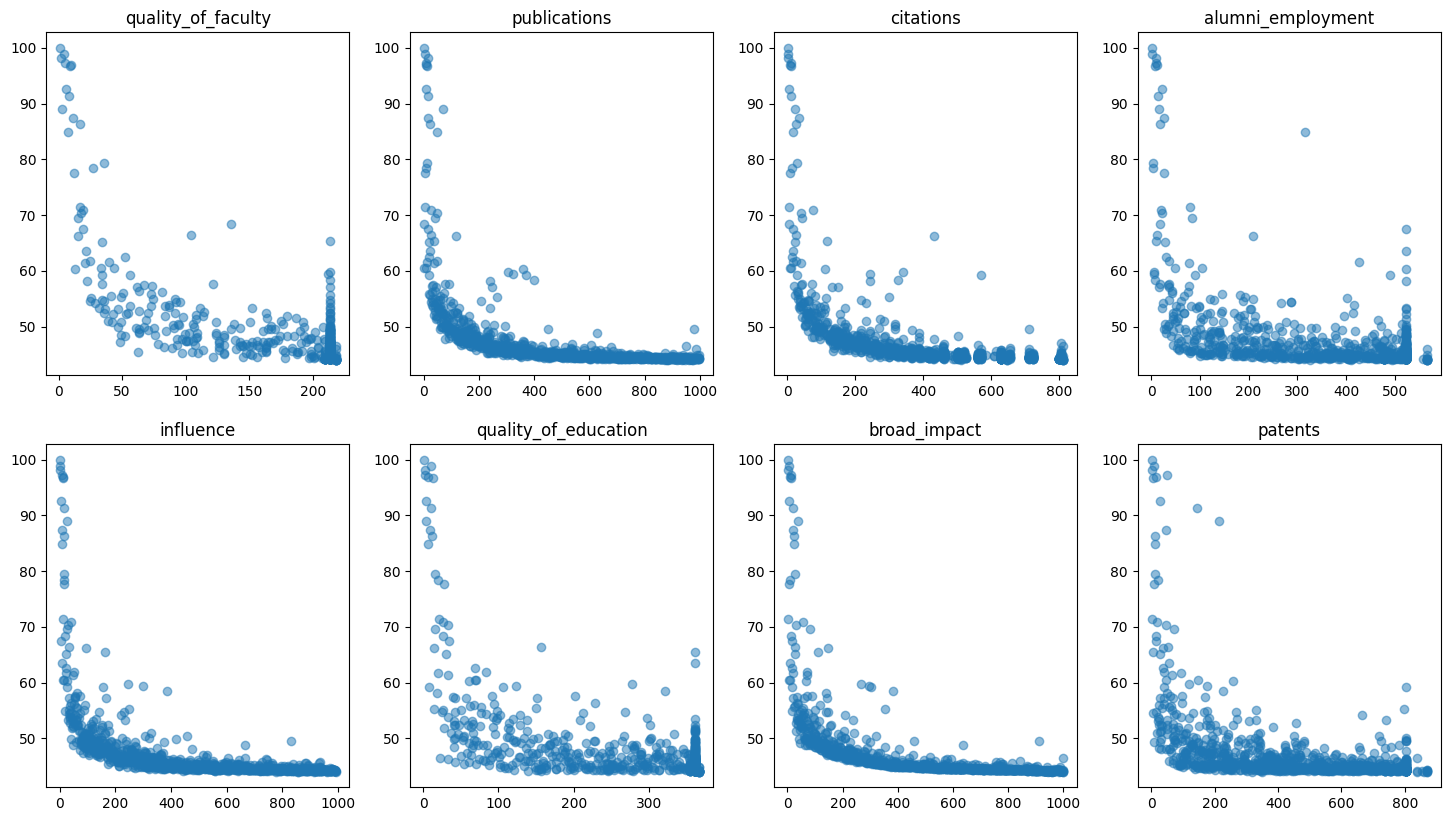

In [ ]:
''' Deprecated '''
# inspect the processed data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize = (18, 10), dpi = 100)
ax = axes.flatten()
for i, feature in enumerate(feature_names):
  ax[i].scatter(df[feature], df['score'], alpha = 0.5)
  ax[i].set_title(feature)

plt.show()

In [6]:
# separate dependent variables and independent variables
X = data_df[feature_names]
# X = df[feature_names]
Y = data_df['score']
# Y = df['score]
X

# Note that all the features are on about the same scale
# therefore whether to perform normalization may not affect the model and its score

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


In [18]:
# split data set into training set and test set
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
RANDOM_SEED = 2021
all_x = np.array(X)
all_y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size = 0.2, random_state = RANDOM_SEED)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 8), (400, 8), (1600,), (400,))

In [19]:
# Linear Regression Model Using Least Square Loss Function
class LinearRegression:

  def __init__(self):
    # B is the beta matrix
    self.B = None

  def fit(self, X, y):
    # print(X.shape, y.shape)
    constants = np.ones(len(X))
    x = np.c_[constants, X]
    # B = (X'X)^(-1) X'Y
    self.B = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T, x)), x.T), y)

  def predict(self, X):
    constants = np.ones(len(X))
    x = np.c_[constants, X]
    return np.matmul(x, self.B)


# metrics functions
def MSE(y, y_hat):
  err = y - y_hat
  err_square = np.matmul(err.T, err)
  mse = err_square/len(y)
  return mse

def RMSE(y, y_hat):
  err = y - y_hat
  err_square = np.matmul(err.T, err)
  rmse = np.sqrt(err_square/len(y))
  return rmse

def cal_determination_coefficient(y, y_hat):
  return 1-MSE(y, y_hat)/np.var(y)

In [20]:
# the naive model
LR = LinearRegression()
LR.fit(x_train, y_train)
p_test = LR.predict(x_test)
rmse = RMSE(y_test, p_test)
print("========= Naive Linear Regression Model =========")
print("RMSE =", rmse)
# calculate the cofficient of determination
determination_coefficient = cal_determination_coefficient(y_test, p_test)
print("coefficient of determination: {:.4f}\n".format(determination_coefficient))

# inspect the weights
import copy
b = copy.deepcopy(LR.B)
b_names = copy.deepcopy(feature_names)
b_names.insert(0, 'y-intercept')
# sort b from least to largest
for i in range(len(b)):
  for j in range(len(b)-i-1):
    if b[j]>b[j+1]:
      b[j], b[j+1] = b[j+1], b[j]
      b_names[j], b_names[j+1] = b_names[j+1], b_names[j]

print("weights:")
for i in range(len(b)):
  print("{}:{:.5f}".format(b_names[i], b[i]))

========= Naive Linear Regression Model =========
RMSE = 4.8289043207528835
coefficient of determination: 0.5878

weights:
quality_of_faculty:-0.05772
alumni_employment:-0.00689
quality_of_education:-0.00625
patents:-0.00255
broad_impact:-0.00234
citations:-0.00002
publications:0.00008
influence:0.00037
y-intercept:64.71109


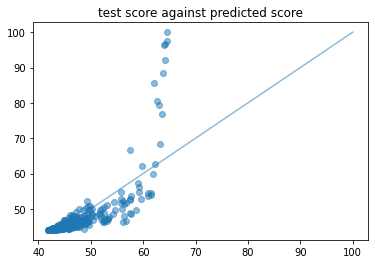

In [21]:
# visualize the relationship between the predicted values and the actual labeled values
plt.scatter(p_test, y_test, alpha = 0.5)
plt.plot([50, 100], [50, 100], alpha=0.5)
plt.title("test score against predicted score")
plt.show()

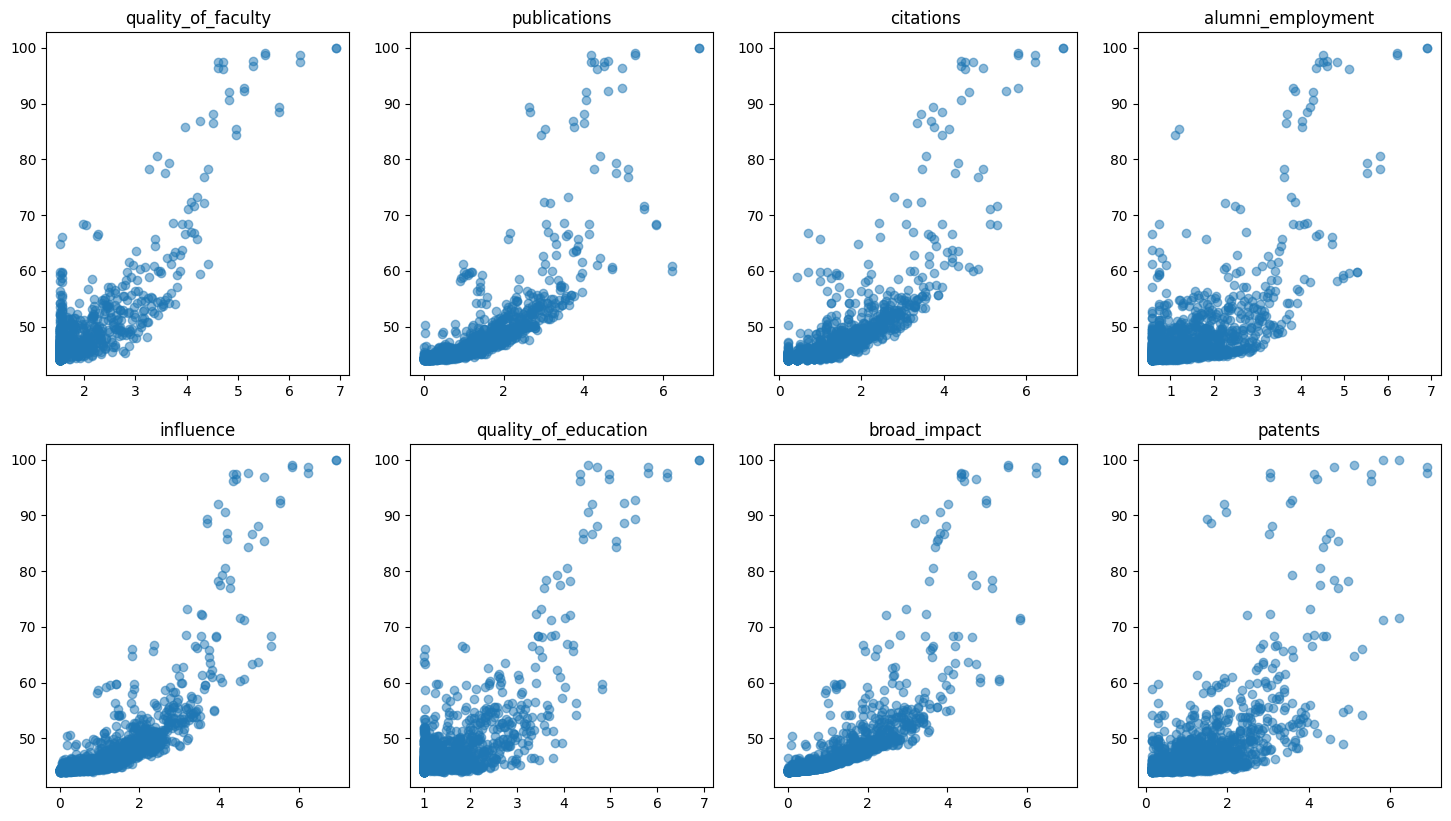


RMSE = 2.4544008826674175
coefficient of determination: 0.8935

weights:
citations:0.01414
publications:0.05246
influence:0.23433
broad_impact:0.74434
patents:0.77878
quality_of_education:1.10054
alumni_employment:1.93180
quality_of_faculty:4.92116
y-intercept:32.79852




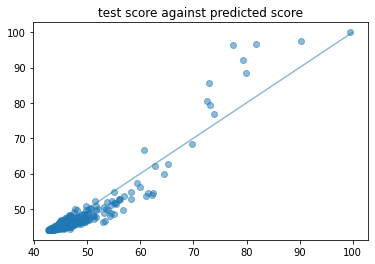

In [22]:
# Data Transformation
# method 1. take inverse of all feature values
all_x3 = copy.deepcopy(all_x)
for i, col in enumerate(all_x3):
  for j, val in enumerate(col):
    all_x3[i][j] = np.log(1000/val) # numerator is 1000 is to avoid negative value that log function can not take in


# inspect the relationship again
all_y3 = copy.deepcopy(all_y)
fig, axes = plt.subplots(2,4, figsize = (18, 10), dpi = 100)
ax = axes.flatten()
for i, feature in enumerate(feature_names):
  ax[i].scatter(all_x3[:, i], all_y3, alpha = 0.5)
  ax[i].set_title(feature)

# plt.savefig("transformation_log(inverse).png")
# files.download("transformation_log(inverse).png")
plt.show()

# split the dataset
x_train3, x_test3, y_train3, y_test3 = train_test_split(all_x3, all_y3, test_size = 0.2, random_state = RANDOM_SEED)
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

# build the model
LR3 = LinearRegression()
LR3.fit(x_train3, y_train3)
p_test3 = LR3.predict(x_test3)
print("\nRMSE =", RMSE(y_test3, p_test3))
determination_coefficient = cal_determination_coefficient(y_test3, p_test3)
print("coefficient of determination: {:.4f}".format(determination_coefficient))

# inspect the weights
b3 = copy.deepcopy(LR3.B)
b_names3 = copy.deepcopy(feature_names)
b_names3.insert(0, 'y-intercept')
# rank b from least to largest
for i in range(len(b3)):
  for j in range(len(b3)-i-1):
    if b3[j]>b3[j+1]:
      b3[j], b3[j+1] = b3[j+1], b3[j]
      b_names3[j], b_names3[j+1] = b_names3[j+1], b_names3[j]

print("\nweights:")
for i in range(len(b3)):
  print("{}:{:.5f}".format(b_names3[i], b3[i]))
print('\n')
# visualize the relationship between the predicted values and the actual labeled values
plt.scatter(p_test3, y_test3, alpha = 0.5)
plt.title("test score against predicted score")
plt.plot([50, 100], [50, 100], alpha=0.5)
plt.show()

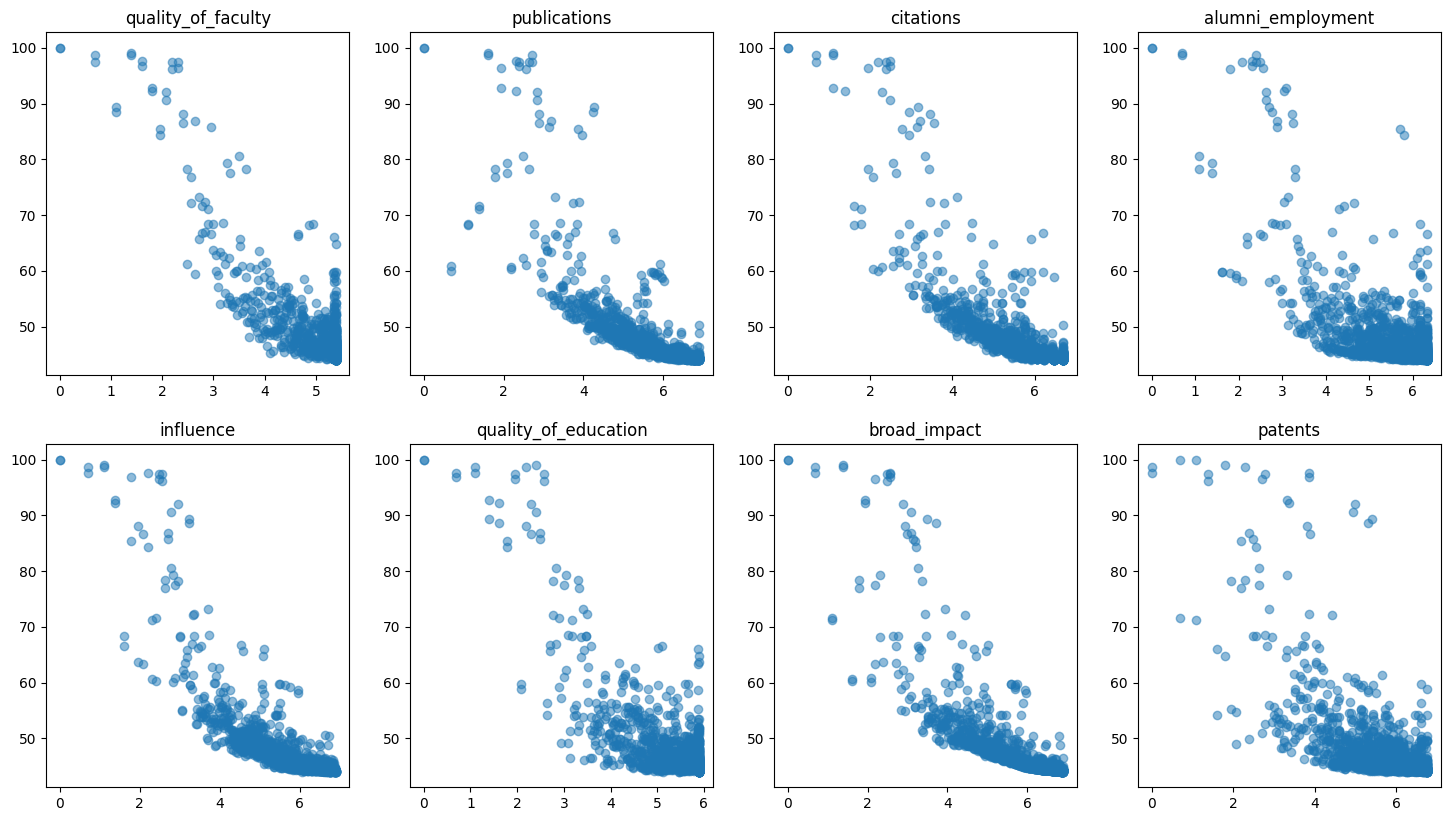


RMSE = 2.4544008826681596
coefficient of determination: 0.8935

weights:
quality_of_faculty:-4.92116
alumni_employment:-1.93180
quality_of_education:-1.10054
patents:-0.77878
broad_impact:-0.74434
influence:-0.23433
publications:-0.05246
citations:-0.01414
y-intercept:100.33937




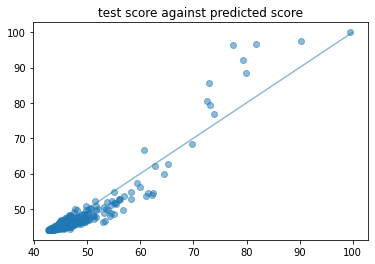

In [25]:
# Data Transformation
# mehtod 2. take natural log of all feature values
all_x2 = copy.deepcopy(all_x)
for i, col in enumerate(all_x2):
  for j, val in enumerate(col):
    all_x2[i][j] = np.log(val)

# inspect the relationship again
all_y2 = copy.deepcopy(all_y)
fig, axes = plt.subplots(2,4, figsize = (18, 10), dpi = 100)
ax = axes.flatten()
for i, feature in enumerate(feature_names):
  ax[i].scatter(all_x2[:, i], all_y2, alpha = 0.5)
  ax[i].set_title(feature)

# plt.savefig("transformation_natural_log.png")
# files.download("transformation_natural_log.png")
plt.show()

# split the dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(all_x2, all_y2, test_size = 0.2, random_state = RANDOM_SEED)
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

# rebuild the model
LR2 = LinearRegression()
LR2.fit(x_train2, y_train2)
p_test2 = LR2.predict(x_test2)
print("\nRMSE =", RMSE(y_test2, p_test2))
determination_coefficient = cal_determination_coefficient(y_test2, p_test2)
print("coefficient of determination: {:.4f}\n".format(determination_coefficient))

# inspect the weights
b2 = copy.deepcopy(LR2.B)
b_names2 = copy.deepcopy(feature_names)
b_names2.insert(0, 'y-intercept')
# rank b from least to largest
for i in range(len(b2)):
  for j in range(len(b2)-i-1):
    if b2[j]>b2[j+1]:
      b2[j], b2[j+1] = b2[j+1], b2[j]
      b_names2[j], b_names2[j+1] = b_names2[j+1], b_names2[j]

print("weights:")
for i in range(len(b)):
  print("{}:{:.5f}".format(b_names2[i], b2[i]))
print('\n')
# visualize the relationship between the predicted values and the actual labeled values
plt.scatter(p_test2, y_test2, alpha = 0.5)
plt.title("test score against predicted score")
plt.plot([50, 100], [50, 100], alpha=0.5)
plt.show()


RMSE = 2.454400882667465
coefficient of determination: 0.8935

weights:
quality_of_faculty:-2.94516
alumni_employment:-1.66539
quality_of_education:-0.82698
patents:-0.74932
broad_impact:-0.73366
influence:-0.23080
publications:-0.05168
citations:-0.01347
y-intercept:47.06068




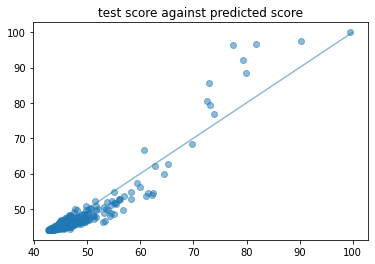

In [ ]:
# try normalization and standardization
X1 = copy.deepcopy(X)
for c in X1.columns:
  X1[c] = np.log(X1[c])
  # X1[c] = (X1[c]-X1[c].min())/(X1[c].max()-X1[c].min())
  X1[c] = (X1[c]-X1[c].mean())/X1[c].std() 

# split the dataset
all_x4 = np.array(X1)
all_y4 = np.array(Y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(all_x4, all_y4, test_size = 0.2, random_state = RANDOM_SEED)

# rebuild the model
LR4 = LinearRegression()
LR4.fit(x_train4, y_train4)
p_test4 = LR4.predict(x_test4)
print("\nRMSE =", RMSE(y_test4, p_test4))
determination_coefficient = cal_determination_coefficient(y_test4, p_test4)
print("coefficient of determination: {:.4f}\n".format(determination_coefficient))

# inspect the weights
b4 = copy.deepcopy(LR4.B)
b_names4 = copy.deepcopy(feature_names)
b_names4.insert(0, 'y-intercept')
# rank b from least to largest
for i in range(len(b4)):
  for j in range(len(b4)-i-1):
    if b4[j]>b4[j+1]:
      b4[j], b4[j+1] = b4[j+1], b4[j]
      b_names4[j], b_names4[j+1] = b_names4[j+1], b_names4[j]

print("weights:")
for i in range(len(b)):
  print("{}:{:.5f}".format(b_names4[i], b4[i]))
print('\n')
# visualize the relationship between the predicted values and the actual labeled values
plt.scatter(p_test4, y_test4, alpha = 0.5)
plt.title("test score against predicted score")
plt.plot([50, 100], [50, 100], alpha=0.5)
plt.show()

In [ ]:
# Using sklearn library's Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lr = linear_model.LinearRegression()
lr.fit(x_train2, y_train2)
p_test2 = lr.predict(x_test2)
print("Coefficients: \n", lr.coef_)
print("RMSE: %.5f" % np.sqrt(mean_squared_error(y_test2, p_test2)))
print("Coefficient of determination: %.4f" % r2_score(y_test2, p_test2))

Coefficients: 
 [-4.9211558  -0.05245855 -0.0141365  -1.93179549 -0.23432763 -1.10054277
 -0.74434219 -0.77878132]
RMSE: 2.45440
Coefficient of determination: 0.8935


In [ ]:
# Using Other Linear Regression Models
from sklearn import linear_model
# Ridge
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(x_test2, y_test2)
p_test2 = ridge.predict(x_test2)
print("Coefficients: \n", ridge.coef_)
print("RMSE: %.5f" % np.sqrt(mean_squared_error(y_test2, p_test2)))
print("Coefficient of determination: %.4f" % r2_score(y_test2, p_test2))

Coefficients: 
 [-5.42671081  0.10571984 -0.39685743 -1.5428377  -0.15374331 -1.24640894
 -0.75866276 -0.75380778]
RMSE: 2.40989
Coefficient of determination: 0.8973


In [ ]:
# Lasso
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_test2, y_test2)
p_test2 = lasso.predict(x_test2)
print("Coefficients: \n", lasso.coef_)
print("RMSE: %.5f" % np.sqrt(mean_squared_error(y_test2, p_test2)))
print("Coefficient of determination: %.4f" % r2_score(y_test2, p_test2))

Coefficients: 
 [-5.22508322 -0.         -0.43501232 -1.4889251  -0.22514535 -1.2387394
 -0.63039273 -0.70296801]
RMSE: 2.41522
Coefficient of determination: 0.8969


In [ ]:
# Elastic Net
EN = linear_model.ElasticNet(alpha=0.1)
EN.fit(x_test2, y_test2)
p_test2 = EN.predict(x_test2)
print("Coefficients: \n", EN.coef_)
print("RMSE: %.5f" % np.sqrt(mean_squared_error(y_test2, p_test2)))
print("Coefficient of determination: %.4f" % r2_score(y_test2, p_test2))

Coefficients: 
 [-3.82945896 -0.0142152  -0.67671177 -1.46199852 -0.56586138 -1.70096323
 -0.5156709  -0.76952032]
RMSE: 2.47139
Coefficient of determination: 0.8920


In [ ]:
# RANSAC Robust Linear Model Estimation
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
p_test = ransac.predict(x_test)
print("RANSAC:\nEstimated coefficients:")
print(ransac.estimator_.coef_)
print('RMSE:', RMSE(y_test, p_test))
print("coefficient of determination: {:.4f}".format(cal_determination_coefficient(y_test, p_test)))

RANSAC:
Estimated coefficients:
[-0.01552405 -0.00044212 -0.00027126 -0.00134201 -0.00021127  0.00034491
 -0.00112663 -0.00026228]
RMSE: 5.764124958743902
coefficient of determination: 0.2043


In [ ]:
# Stochastic Gradient Descent Regression
SGD = linear_model.SGDRegressor(loss='squared_error')
SGD.fit(x_train2, y_train2)
p_test2 = SGD.predict(x_test2)
print("SGDRegressor:\nEstimated coefficients:")
print(SGD.coef_)
print('RMSE:', RMSE(y_test2, p_test2))
print("coefficient of determination: {:.4f}".format(cal_determination_coefficient(y_test2, p_test2)))

SGDRegressor:
Estimated coefficients:
[-3.76511194 -0.12286553 -0.0995861  -1.66390709 -0.78288575 -1.05035262
 -0.36209652 -0.66457048]
RMSE: 2.672104621646235
coefficient of determination: 0.8738


In [ ]:
# Other regression models
# Decision Tree Regressor
from sklearn import tree

DT = tree.DecisionTreeRegressor()
DT.fit(x_train, y_train)
p_test = DT.predict(x_test)
print('RMSE:', RMSE(y_test, p_test))
print("coefficient of determination: {:.4f}".format(cal_determination_coefficient(y_test, p_test)))


RMSE: 0.9240259736609141
coefficient of determination: 0.9849


In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)
p_test = RF.predict(x_test)
print('RMSE:', RMSE(y_test, p_test))
print("coefficient of determination: {:.4f}".format(cal_determination_coefficient(y_test, p_test)))

RMSE: 0.6100687599975884
coefficient of determination: 0.9934


In [ ]:
# MLP regression
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(learning_rate_init=0.01)
MLP.fit(x_train, y_train)
p_test = DT.predict(x_test)
print('RMSE:', RMSE(y_test, p_test))
print("coefficient of determination: {:.4f}".format(cal_determination_coefficient(y_test, p_test)))

RMSE: 0.9240259736609141
coefficient of determination: 0.9849


In [ ]:
# find out all regions
region_names = list(set(data_df['region']))
print(region_names)
print(len(region_names))

['Mexico', 'Czech Republic', 'Taiwan', 'Sweden', 'Hong Kong', 'New Zealand', 'Russia', 'Norway', 'Lebanon', 'Lithuania', 'Germany', 'China', 'USA', 'United Arab Emirates', 'Uganda', 'Puerto Rico', 'Cyprus', 'Finland', 'Colombia', 'Iran', 'Austria', 'Ireland', 'Slovak Republic', 'Greece', 'Bulgaria', 'Serbia', 'Croatia', 'South Korea', 'Turkey', 'Portugal', 'Switzerland', 'Israel', 'Argentina', 'Saudi Arabia', 'Chile', 'Japan', 'Netherlands', 'Poland', 'Spain', 'Egypt', 'France', 'United Kingdom', 'Canada', 'Singapore', 'Australia', 'Uruguay', 'Belgium', 'Romania', 'Brazil', 'India', 'Denmark', 'Italy', 'South Africa', 'Iceland', 'Slovenia', 'Hungary', 'Thailand', 'Estonia', 'Malaysia']
59


In [ ]:
# add the region as a predictor of the model
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, OneHotEncoder
import math
# Generate region onehot values
regions = [[r] for r in region_names]
enc = OneHotEncoder()
enc.fit(regions)
regions = [[r] for r in data_df['region']]

regions = enc.transform(regions).toarray()

for i, r in enumerate(regions):
  val = data_df['national_rank'][200+i]
  regions[i] = regions[i]*math.log(val) 
# inspect
print(regions[100])

all_x5 = np.c_[all_x2, regions]
all_x5.shape

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.69314718 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


(2000, 67)


RMSE = 2.383009303805729
coefficient of determination: 0.8996

weights:
quality_of_faculty:-4.53680
alumni_employment:-2.11717
quality_of_education:-1.22342
Croatia:-1.17250
broad_impact:-0.99236
patents:-0.84112
influence:-0.80831
Denmark:-0.61780
Belgium:-0.55320
Sweden:-0.38192
citations:-0.08516
New Zealand:-0.00000
Switzerland:-0.00000
Portugal:-0.00000
Slovak Republic:-0.00000
China:-0.00000
Germany:-0.00000
Australia:-0.00000
Hungary:0.00000
Thailand:0.00000
Spain:0.00000
Canada:0.00000
Puerto Rico:0.00000
Slovenia:0.02366
Estonia:0.05232
India:0.11064
Colombia:0.22270
Turkey:0.25871
Finland:0.34724
Russia:0.38752
Czech Republic:0.41265
Romania:0.42566
Lebanon:0.43347
publications:0.48139
United Arab Emirates:0.50492
South Korea:0.52836
Chile:0.52935
Brazil:0.53257
Greece:0.53645
Taiwan:0.55355
Malaysia:0.56775
Cyprus:0.57916
Saudi Arabia:0.58606
Poland:0.72649
Serbia:0.78340
Israel:0.82621
Italy:0.84108
United Kingdom:0.85122
Hong Kong:0.85182
France:0.88738
Japan:0.89147
Aust

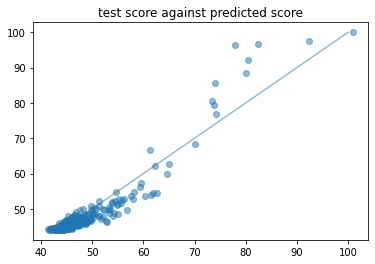

In [ ]:
# split the dataset
x_train5, x_test5, y_train5, y_test5 = train_test_split(all_x5, all_y2, test_size = 0.2, random_state = RANDOM_SEED)
# rebuild the model
LR5 = LinearRegression()
LR5.fit(x_train5, y_train5)
p_test5 = LR5.predict(x_test5)
print("\nRMSE =", RMSE(y_test5, p_test5))
determination_coefficient = cal_determination_coefficient(y_test5, p_test5)
print("coefficient of determination: {:.4f}\n".format(determination_coefficient))

# inspect the weights
b5 = copy.deepcopy(LR5.B)
b_names5 = copy.deepcopy(feature_names)
b_names5.insert(0, 'y-intercept')
for c in region_names:
  b_names5.append(c)
# rank b from least to largest
for i in range(len(b5)):
  for j in range(len(b5)-i-1):
    if b5[j]>b5[j+1]:
      b5[j], b5[j+1] = b5[j+1], b5[j]
      b_names5[j], b_names5[j+1] = b_names5[j+1], b_names5[j]

print("weights:")
for i in range(len(b_names5)):
  print("{}:{:.5f}".format(b_names5[i], b5[i]))
print('\n')
# visualize the relationship between the predicted values and the actual labeled values
plt.scatter(p_test5, y_test5, alpha = 0.5)
plt.title("test score against predicted score")
plt.plot([50, 100], [50, 100], alpha=0.5)
plt.show()